In [105]:
# import libraries 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")
# neural networks
from keras import layers
from keras import models
from keras import regularizers

# classification error metrics
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve


In [106]:
data_header = pd.read_csv('col_header.txt',header=None)
data_header = data_header.rename(columns={0:"anamoly_type"})

In [107]:
data_header

,anamoly_type
0,1.Adding an already existing block (.*)\t
1,2.(.*)Verification succeeded for (.*)\t
2,3.(.*) Served block (.*) to (.*)
3,4.(.*):Got exception while serving (.*) to (.*...
4,5.Receiving block (.*) src: (.*) dest: (.*)\t
5,6.Received block (.*) src: (.*) dest: (.*) of ...
6,7.writeBlock (.*) received exception (.*)
7,8.PacketResponder ([-]?[0-9]+) for block (.*) ...
8,9.Received block (.*) of size ([-]?[0-9]+) fro...
9,10.PacketResponder (.*) ([-]?[0-9]+) Exception...


In [108]:
data_label = pd.read_csv('mlabel.txt', sep=" ", header=None, nrows=50000)

In [109]:
labels = data_label[0]

In [110]:
data = pd.read_csv('rawTFVector.txt', sep=" ", header=None,na_filter=False, error_bad_lines=False,nrows=50000)
data.shape
# error_bad_lines=False , Do note that this will cause the offending lines to be skipped.
# If file contains no header row, then you should explicitly pass header=None". 

(50000, 31)

In [111]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [112]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.0,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,0.0,0.207520,0.754000,0.634180,2.997180,0.012260,0.005700,0.000060,2.968520,0.000100,2.968720,0.000060,0.001920,0.000160,0.000080,0.012100,0.0,0.012140,0.0,0.003240,2.434940,0.9999,2.424440,0.000020,0.012140,2.99184,0.001600,0.002480,0.000040
std,0.0,0.576318,2.701102,1.660184,0.216825,0.141103,0.077638,0.007746,0.305501,0.014832,0.304932,0.007746,0.075871,0.014141,0.010954,0.137673,0.0,0.138105,0.0,0.058903,1.185359,0.0100,1.184246,0.004472,0.138105,0.40291,0.039968,0.049738,0.006324
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,3.000000,1.0000,3.000000,0.000000,0.000000,3.00000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,3.000000,1.0000,3.000000,0.000000,0.000000,3.00000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,3.000000,1.0000,3.000000,0.000000,0.000000,3.00000,0.000000,0.000000,0.000000
max,0.0,3.000000,203.000000,30.000000,10.000000,7.000000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.0,4.000000,0.0,2.000000,10.000000,1.0000,10.000000,1.000000,4.000000,10.00000,1.000000,1.000000,1.000000


In [113]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0,0,6,3,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,3,1,3,0,0,3,0,0,0,,%%blk_-100000266894974466


In [114]:
# dropping the below columns as they do contains only NaNs.
data = data.drop(columns=[0,16,18,29,30])

In [115]:
#df = pd.concat(data_header['anamoly_type'],data)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
1     50000 non-null int64
2     50000 non-null int64
3     50000 non-null int64
4     50000 non-null int64
5     50000 non-null int64
6     50000 non-null int64
7     50000 non-null int64
8     50000 non-null int64
9     50000 non-null int64
10    50000 non-null int64
11    50000 non-null int64
12    50000 non-null int64
13    50000 non-null int64
14    50000 non-null int64
15    50000 non-null int64
17    50000 non-null int64
19    50000 non-null int64
20    50000 non-null int64
21    50000 non-null int64
22    50000 non-null int64
23    50000 non-null int64
24    50000 non-null int64
25    50000 non-null int64
26    50000 non-null int64
27    50000 non-null int64
28    50000 non-null int64
dtypes: int64(26)
memory usage: 9.9 MB


In [117]:
data.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
17    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int64

In [118]:
#df = pd.concat(data_header,data,ignore_index=True)

In [119]:
labels.shape

(50000,)

In [120]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,20,21,22,23,24,25,26,27,28
0,0,6,3,3,0,0,0,3,0,3,0,0,0,0,0,0,0,3,1,3,0,0,3,0,0,0
1,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,3,1,3,0,0,3,0,0,0
2,1,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,3,1,3,0,0,3,0,0,0
3,0,3,4,3,0,0,0,3,0,3,0,0,0,0,0,0,0,3,1,3,0,0,3,0,0,0
4,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,3,1,3,0,0,3,0,0,0


In [121]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [122]:
type(data)

pandas.core.frame.DataFrame

In [123]:
data = data.to_numpy()

In [124]:
type(data)

numpy.ndarray

In [125]:
data = data.astype(float)

In [126]:
data

array([[0., 6., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 6., 3., ..., 0., 0., 0.]])

In [127]:
train_data = data[:30000]
test_data = data[30000:]

In [128]:
train_labels = labels[:30000]
test_labels = labels[30000:]

In [129]:
# normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [130]:
std

array([0.58, 2.94, 1.67, 0.22, 0.15, 0.08, 0.01, 0.3 , 0.01, 0.3 , 0.01,
       0.08, 0.01, 0.01, 0.14, 0.14, 0.03, 1.19, 0.01, 1.19, 0.01, 0.14,
       0.41, 0.04, 0.05, 0.01])

# error metrics functions

In [131]:
def plot_accuracy(acc,val_acc):
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, acc, 'r', label='Training aaccuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [132]:
def plot_loss(loss,val_loss):
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [133]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.Model 
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

# plt.show()

In [134]:
def print_error_metrics(y1,y2):
    print("accuracy score : %.3f" % accuracy_score(y1,y2))
    print("balanced accuracy score : %.3f" % balanced_accuracy_score(y1,y2))
    print("f1_score : %.3f" % f1_score(y1,y2))
    print("precision_score : %.3f" % precision_score(y1,y2))     
    print("recall_score : %.3f" % recall_score(y1,y2))
    #print("average precision_score : %.3f" % average_precision_score(y1,y2))    //y2=y_score
    #print("precision, recall, threshold : %.3f" % precision_recall_curve(y_true, y_scores))
    print("fbeta_score_0.5 : %.3f" % metrics.fbeta_score(y1,y2, beta=0.5))
    print("fbeta_score_1 : %.3f" % metrics.fbeta_score(y1,y2, beta=1))  
    print("fbeta_score_2 : %.3f" % metrics.fbeta_score(y1,y2, beta=2))
    #print("precision_recall_fscore_support: %.3f" % metrics.precision_recall_fscore_support(y1,y2, beta=0.5))  
    return None

In [135]:
x_train = np.asarray(train_data).astype(float)
x_test = np.asarray(test_data).astype(float)
y_train = np.asarray(train_labels).astype(float)
y_test = np.asarray(test_labels).astype(float)

In [136]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu',input_shape=(26,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [137]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 48,129
Trainable params: 48,129
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [139]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [140]:
x_train.shape,x_test.shape,x_val.shape,partial_x_train.shape

((30000, 26), (20000, 26), (10000, 26), (20000, 26))

In [141]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print(results)
y_pred = model.predict(x_test)

Train on 20000 samples, validate on 10000 samples
Epoch 1/20
20000/20000 [==============================] - 1s 27us/step - loss: 0.1044 - acc: 0.9920 - val_loss: 0.0093 - val_acc: 0.9991
Epoch 2/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.0049 - acc: 0.9989 - val_loss: 0.0069 - val_acc: 0.9992
Epoch 3/20
20000/20000 [==============================] - 0s 8us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0060 - val_acc: 0.9992
Epoch 4/20
20000/20000 [==============================] - 0s 7us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0066 - val_acc: 0.9992
Epoch 5/20
20000/20000 [==============================] - 0s 9us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0066 - val_acc: 0.9992
Epoch 6/20
20000/20000 [==============================] - 0s 10us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0063 - val_acc: 0.9992
Epoch 7/20
20000/20000 [==============================] - 0s 11us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0065 - val_acc: 0.

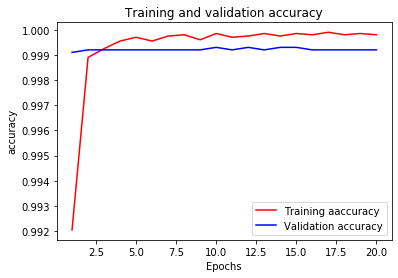

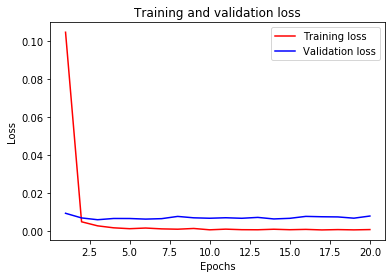

In [142]:
accuracy,val_accuracy = history.history['acc'],history.history['val_acc']
loss,val_loss = history.history['loss'],history.history['val_loss']
plot_accuracy(accuracy,val_accuracy)
plot_loss(loss,val_loss)

accuracy score : 1.000
balanced accuracy score : 0.998
f1_score : 0.995
precision_score : 0.994
recall_score : 0.996
fbeta_score_0.5 : 0.995
fbeta_score_1 : 0.995
fbeta_score_2 : 0.996
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     19460
     Anamoly       0.99      1.00      1.00       540

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion matrix, without normalization
[[19457     3]
 [    2   538]]
Normalized confusion matrix
[[1.00e+00 1.54e-04]
 [3.70e-03 9.96e-01]]


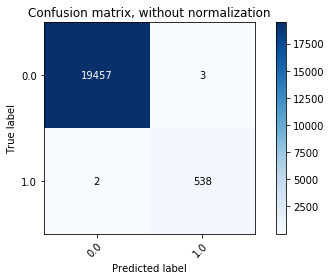

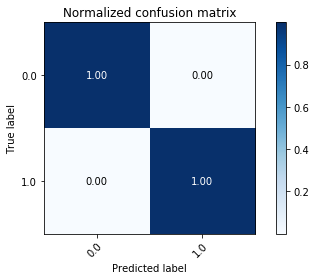

In [143]:
print_error_metrics(y_test,y_pred.round())

target_names = ['Normal', 'Anamoly']
print(classification_report(y_test, y_pred.round(), target_names=target_names))


classes = list(unique_labels(y_test, y_pred.round()))

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), classes=classes,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), classes=classes, normalize=True,title='Normalized confusion matrix')

plt.show()

# Using SMOTE`

In [144]:
from imblearn.over_sampling import SMOTE

In [145]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

y = labels
X = data

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [146]:
(X.shape,x_train.shape)

((50000, 26), (78148, 26))

In [147]:
np.unique(y,return_counts=True),np.unique(y,return_counts=True)

((array([0, 1], dtype=int64), array([48833,  1167], dtype=int64)),
 (array([0, 1], dtype=int64), array([48833,  1167], dtype=int64)))

In [148]:
type(x_train)

numpy.ndarray

In [149]:
np.max(x_train)

519.618129142294

In [150]:
x_train

array([[-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       ...,
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       [ 1.38,  0.08, -0.38, ..., -0.04, -0.05, -0.01],
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01]])

In [151]:
x_train.shape,x_test.shape

((78148, 26), (10000, 26))

In [152]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([39074, 39074], dtype=int64))

In [153]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([9759,  241], dtype=int64))

In [154]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [155]:
x_train

array([[-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       ...,
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01],
       [ 1.38,  0.08, -0.38, ..., -0.04, -0.05, -0.01],
       [-0.36, -0.26, -0.38, ..., -0.04, -0.05, -0.01]])

In [156]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print(results)
y_pred = model.predict(x_test)

Train on 68148 samples, validate on 10000 samples
Epoch 1/20
68148/68148 [==============================] - 1s 10us/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0031 - val_acc: 0.9997
Epoch 2/20
68148/68148 [==============================] - 0s 6us/step - loss: 0.0022 - acc: 0.9996 - val_loss: 0.0024 - val_acc: 0.9997
Epoch 3/20
68148/68148 [==============================] - 0s 6us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0029 - val_acc: 0.9997
Epoch 4/20
68148/68148 [==============================] - 0s 6us/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0028 - val_acc: 0.9998
Epoch 5/20
68148/68148 [==============================] - 1s 9us/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0030 - val_acc: 0.9997
Epoch 6/20
68148/68148 [==============================] - 0s 6us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0032 - val_acc: 0.9998
Epoch 7/20
68148/68148 [==============================] - 0s 7us/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0034 - val_acc: 0.99

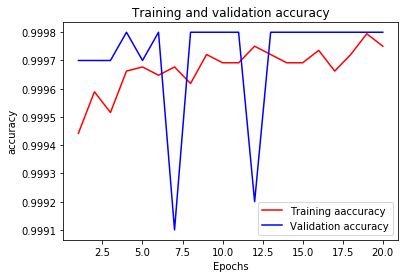

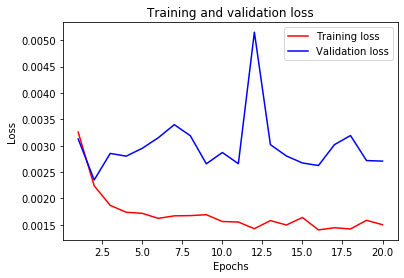

In [157]:
accuracy,val_accuracy = history.history['acc'],history.history['val_acc']
loss,val_loss = history.history['loss'],history.history['val_loss']
plot_accuracy(accuracy,val_accuracy)
plot_loss(loss,val_loss)

accuracy score : 1.000
balanced accuracy score : 1.000
f1_score : 0.998
precision_score : 0.996
recall_score : 1.000
fbeta_score_0.5 : 0.997
fbeta_score_1 : 0.998
fbeta_score_2 : 0.999
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      9759
     Anamoly       1.00      1.00      1.00       241

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion matrix, without normalization
[[9758    1]
 [   0  241]]
Normalized confusion matrix
[[1.00e+00 1.02e-04]
 [0.00e+00 1.00e+00]]


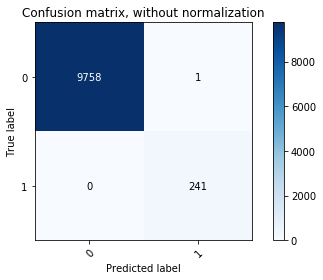

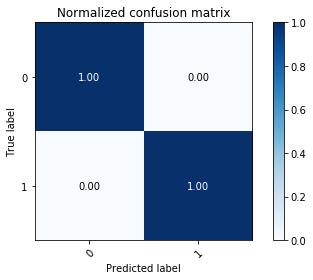

In [158]:
print_error_metrics(y_test,y_pred.round())

target_names = ['Normal', 'Anamoly']
print(classification_report(y_test, y_pred.round(), target_names=target_names))

classes = list(unique_labels(y_test, y_pred.round()))

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), classes=classes,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), classes=classes, normalize=True,title='Normalized confusion matrix')

plt.show()

# adding drop out layers

In [159]:
type(model)

keras.engine.sequential.Sequential

In [160]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu',input_shape=(26,)))
model.add(layers.Dropout(.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print(results)
y_pred = model.predict(x_test)

Train on 68148 samples, validate on 10000 samples
Epoch 1/20
68148/68148 [==============================] - 1s 19us/step - loss: 0.1074 - acc: 0.9649 - val_loss: 0.0155 - val_acc: 0.9973
Epoch 2/20
68148/68148 [==============================] - 1s 12us/step - loss: 0.0081 - acc: 0.9989 - val_loss: 0.0132 - val_acc: 0.9991
Epoch 3/20
68148/68148 [==============================] - 1s 11us/step - loss: 0.0069 - acc: 0.9993 - val_loss: 0.0134 - val_acc: 0.9991
Epoch 4/20
68148/68148 [==============================] - 1s 12us/step - loss: 0.0068 - acc: 0.9993 - val_loss: 0.0132 - val_acc: 0.9991
Epoch 5/20
68148/68148 [==============================] - 1s 11us/step - loss: 0.0068 - acc: 0.9994 - val_loss: 0.0136 - val_acc: 0.9991
Epoch 6/20
68148/68148 [==============================] - 1s 11us/step - loss: 0.0063 - acc: 0.9994 - val_loss: 0.0042 - val_acc: 0.9997
Epoch 7/20
68148/68148 [==============================] - 1s 13us/step - loss: 0.0060 - acc: 0.9993 - val_loss: 0.0114 - val_acc

In [161]:
# saving the model after training
model.save('final_model_using_model_save.h5')

In [162]:
model.layers

In [163]:
model.inputs 

[<tf.Tensor 'dense_13_input:0' shape=(?, 26) dtype=float32>]

In [164]:
model.outputs

[<tf.Tensor 'dense_16/Sigmoid:0' shape=(?, 1) dtype=float32>]

In [165]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               6912      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [166]:
model.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_13',
    'trainable': True,
    'batch_input_shape': (None, 26),
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_4',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.5,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_14',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initial

In [167]:
#model.get_weights()

In [168]:
json_string = model.to_json()
#json_string

In [169]:
yaml_string = model.to_yaml()
#yaml_string

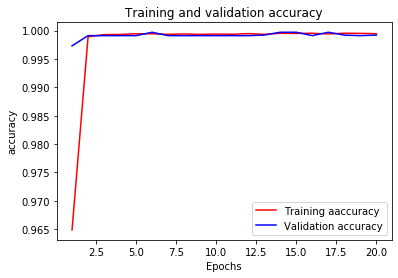

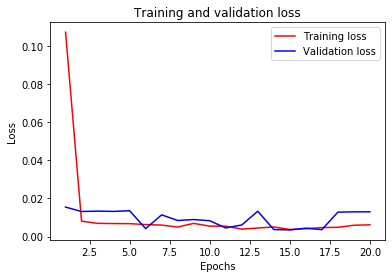

In [170]:
accuracy,val_accuracy = history.history['acc'],history.history['val_acc']
loss,val_loss = history.history['loss'],history.history['val_loss']
plot_accuracy(accuracy,val_accuracy)
plot_loss(loss,val_loss)

accuracy score : 0.999
balanced accuracy score : 0.999
f1_score : 0.976
precision_score : 0.953
recall_score : 1.000
fbeta_score_0.5 : 0.962
fbeta_score_1 : 0.976
fbeta_score_2 : 0.990
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      9759
     Anamoly       0.95      1.00      0.98       241

    accuracy                           1.00     10000
   macro avg       0.98      1.00      0.99     10000
weighted avg       1.00      1.00      1.00     10000

Confusion matrix, without normalization
[[9747   12]
 [   0  241]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


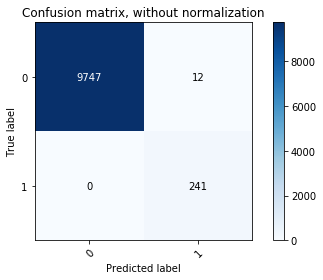

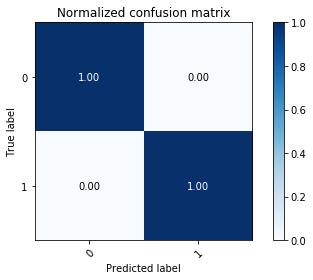

In [171]:
print_error_metrics(y_test,y_pred.round())

target_names = ['Normal', 'Anamoly']
print(classification_report(y_test, y_pred.round(), target_names=target_names))


classes = list(unique_labels(y_test, y_pred.round()))

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), classes=classes,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), classes=classes, normalize=True,title='Normalized confusion matrix')

plt.show()

In [172]:
#np.unique(y_pred,return_counts=True)

In [173]:
#np.unique(y_test,return_counts=True)

In [174]:
#np.unique(y_pred,return_counts=True)

# using Random Forest on SMOKE DATA

C:\Users\eanusau\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score : 1.000
balanced accuracy score : 0.998
f1_score : 0.992
precision_score : 0.988
recall_score : 0.996
fbeta_score_0.5 : 0.989
fbeta_score_1 : 0.992
fbeta_score_2 : 0.994
              precision    recall  f1-score   support

Mobile phone       1.00      1.00      1.00      9759
     Machine       0.99      1.00      0.99       241

    accuracy                           1.00     10000
   macro avg       0.99      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion matrix, without normalization
[[9756    3]
 [   1  240]]
Normalized confusion matrix
[[1.00e+00 3.07e-04]
 [4.15e-03 9.96e-01]]


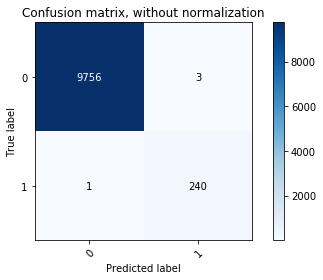

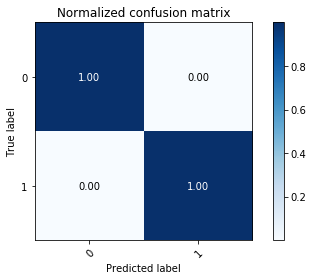

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf_smote = RandomForestClassifier(random_state=123)
rf_smote.fit(partial_x_train, partial_y_train)
y_pred = rf_smote.predict(x_test)

print_error_metrics(y_test,y_pred)

target_names = ['Mobile phone', 'Machine']
print(classification_report(y_test, y_pred, target_names=target_names))


classes = list(unique_labels(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,title='Normalized confusion matrix')

plt.show()

In [176]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([9759,  241], dtype=int64))

In [177]:
np.unique(y_pred,return_counts=True)

(array([0, 1], dtype=int64), array([9757,  243], dtype=int64))

In [178]:
classes = list(unique_labels(y_test, y_pred))
print(classes)

[0, 1]
